# Big Ideas Final Project
Greg Guazzone, Jordan Shopp, and Salem Zenati

---

## Introduction: 
Finding the answer to "Best Neighborhood in Pittsburgh" is a tricky one, but when it comes down to it, we decided that it was most important to find a neighborhood that is geared towards Best neighborhood to raise a family.. Growing up in different parts of the country, we acknowledged how different the experience of growing up can be based off of where it is done. A lot of families move for their children, and we wanted to find which Pittsburgh neighborhood would be the *best* to raise a child.

Looking at the datasets in the WPRDC, along with our personal experiences and what we have heard parents say in the past, we chose the following submetrics to analyze:
* Lowest crime rate (https://data.wprdc.org/dataset/uniform-crime-reporting-data)
* Education (https://data.wprdc.org/dataset/pittsburgh-public-school-locations)
* Recreation (https://data.wprdc.org/dataset/playground-equipment)

We think that these submetrics constitute the most important aspect parents look at when looking for a place to raise their children.

---


## Our findings
Below, we import our submetrics found from our analyses.
### Schools:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:


In [5]:
import pandas as pd
schools_df = pd.read_csv('export_schools.csv')
print(schools_df)
schools_df.index = pd.to_numeric(schools_df.index, errors='coerce')
schools_df['Points'] = 100 - schools_df.index
schools_df = schools_df[['Neighborhood', 'Points']]
display(schools_df.head(10))

    Unnamed: 0         Neighborhood  Overall_score
0           49         Point Breeze       5.213990
1           46   Point Breeze North       5.127372
2           68  Squirrel Hill North       5.122682
3            0       Homewood North       5.113430
4           67        Regent Square       5.103980
..         ...                  ...            ...
73          71        East Carnegie       4.292746
74          25           Glen Hazel       4.156016
75          77     Spring Hill-City       4.066899
76          37        Spring Garden       4.063655
77          76                Bluff       4.037349

[78 rows x 3 columns]


,Neighborhood,Points
0,Point Breeze,100
1,Point Breeze North,99
2,Squirrel Hill North,98
3,Homewood North,97
4,Regent Square,96
5,Squirrel Hill South,95
6,Homewood South,94
7,Highland Park,93
8,Shadyside,92
9,East Hills,91


### Parks:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:

In [8]:
parks_df = pd.read_csv('export_parks.csv')
parks_df.index = pd.to_numeric(parks_df.index, errors='coerce')
parks_df['Points'] = 100 - parks_df.index
parks_df = parks_df[['Neighborhood', 'Points']]
display(parks_df.head(10))

,Neighborhood,Points
0,Squirrel Hill South,100
1,East Liberty,99
2,Squirrel Hill North,98
3,Regent Square,97
4,Beechview,96
5,Fineview,95
6,Allegheny Center,94
7,South Side Slopes,93
8,Hazelwood,92
9,Sheraden,91


### Crime:
    The 10 best schools in Pittsburgh are located in the following neighborhoods:

In [20]:
crime_df = pd.read_csv('export_crime.csv')
crime_df.index = pd.to_numeric(crime_df.index, errors='coerce')
crime_df['Points'] =  crime_df.index + 3
crime_df = crime_df.rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood'})
crime_df = crime_df[['Neighborhood', 'Points']]
crime_df = crime_df.sort_values(by=['Points'], ascending=False)
display(crime_df.head(10))

,Neighborhood,Points
97,Mt. Oliver Boro,100
96,Mt. Oliver Neighborhood,99
95,Outside County,98
94,Troy Hill-Herrs Island,97
93,Ridgemont,96
92,Chartiers City,95
91,New Homestead,94
90,Outside State,93
89,East Carnegie,92
88,Swisshelm Park,91


### Combined Metric
To combine all of our submetrics, we chose to make a uniform point system based for each submetric. Looking at our original submetics and their differneces in magnitude, we had to do this ourselves. For each submetric, we awarded 100 points to the best neighborhood in that submetric, 99 to the second best, etc etc. We summed the points awarded, giving us the Total Points, our final metric.

In [26]:
combined_df = pd.merge(schools_df, parks_df, on='Neighborhood', how='outer')
combined_df = pd.merge(combined_df, crime_df, on='Neighborhood', how='outer')

combined_df = combined_df.fillna(0)

combined_df['Total Points'] = combined_df['Points_x'] + combined_df['Points_y'] + combined_df['Points']

combined_df = combined_df.sort_values(by=['Total Points'], ascending=False).reset_index(drop=True)
combined_df = combined_df[['Neighborhood', 'Total Points']]


## Results
After combining our individual metrics into the final metric, we found that Regent Square is the best neighborhood to raise children. It scored well in all categories, allowing it to excel overall. This makes ssense with some knowledge of the neighborhood. According to Niche.com, it is the #1 neighborhood to live in Pittsburgh and the #17 best neighborhood in the US. It is a desireable neighborhood to live in with rising housing prices.

<p align= "center" >
<img src="https://i0.wp.com/nextpittsburgh.com/wp-content/uploads/2018/08/Untitled-design-27.png?w=800&ssl=1" width="500">
</p>
https://i0.wp.com/nextpittsburgh.com/wp-content/uploads/2018/08/Untitled-design-27.png?w=800&ssl=1


Below is the child-raising index for all the neighborhoods.

,Neighborhood,Total Points
0,Regent Square,281.0
1,Swisshelm Park,234.0
2,Squirrel Hill North,230.0
3,New Homestead,228.0
4,Fairywood,223.0
5,Perry North,219.0
6,Allegheny Center,218.0
7,Beltzhoover,216.0
8,Hays,214.0
9,Garfield,209.0


<AxesSubplot:>

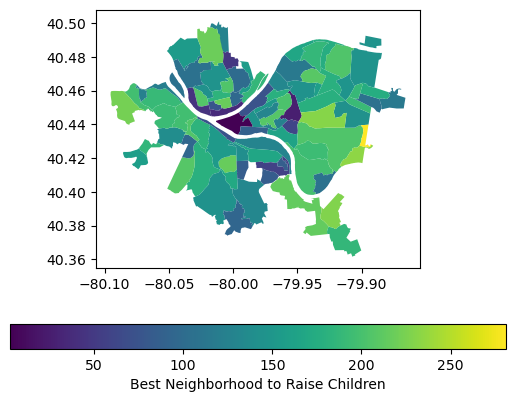

In [32]:
# Display the DataFrame
display(combined_df.head(10))

import matplotlib.pyplot as plt
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods_Geopandas_Dir/Neighborhoods_.shp") # read in the shapefile

# Merge the geodataframe with the neighborhood ratio dataframe (the one with equipment count, park count, and ratio)
map_combined = neighborhoods.merge(combined_df, how='left', left_on='hood', right_on='Neighborhood')
map_combined.plot(column='Total Points', legend=True, legend_kwds={"label": "Best Neighborhood to Raise Children", "orientation": "horizontal"})


## Conclusions

#### Jordan
I personally always thought Squirrel Hill North would be the nices places to raise Children. I always thought the houses were very suburban-like, and remember myh coworkers telling me it was a very good place for families, if you could afford it. Not knowing much about Regent Square before, I was suprised it won, but after doing further research, it makes sense. It is not too crowded, has many amenities, and is importantly safe. After looking up the best neighborhoods for families online, I see it at the top of most lists.